# Matt Kearney - CS 559 - HW8

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

DF = pd.read_csv('Hitters.csv')

 #### b. [15 pts] The data set is raw data set and it needs to be trained before applying base learners. There are a few missing targets and three discrete features, while the rest are continuous. Impute the missing target values with a mean value. Convert the text features to integers. Split the data set into train and test sets in the ratio of 8 to 2. Calculate the standard deviation of the test target. This will be used as a target error value.

In [317]:
m, n = DF.shape
print(f"({m}, {n})")
DF.describe()

(322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [318]:
DF.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


#### Find missing values

In [319]:
DF.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [320]:
mean_salary = DF['Salary'].mean()
mean_salary

535.9258821292775

#### Impute mean salary into missing

In [321]:
for obs in range(0,m):
    if (pd.isna(DF['Salary'][obs])):
        DF.loc[obs, 'Salary'] = mean_salary

DF['Salary'].fillna(mean_salary, inplace=True)
DF['Salary'].head() # check that mean was imputed

0    535.925882
1    475.000000
2    480.000000
3    500.000000
4     91.500000
Name: Salary, dtype: float64

#### We should also change 'League', 'Division', and 'New League' to integers (ordinal data).

In [322]:
print("Different leagues: \t", DF['League'].unique())
print("Different divisions: \t", DF['Division'].unique())
print("Different new leagues: \t", DF['NewLeague'].unique())

for i in range(0,m):
    if (DF['League'][i]=='A'): # change 'A' to 0
        DF.loc[i, 'League'] = 0
    else: # change 'N' to 1
        DF.loc[i, 'League'] = 1

    if (DF['Division'][i]=='E'): #change 'E' to 0
        DF.loc[i, 'Division'] = 0
    else:  # change 'W' to 1
        DF.loc[i, 'Division'] = 1

    if (DF['NewLeague'][i]=='A'): # change 'A' to 0
        DF.loc[i, 'NewLeague'] = 0
    else: # change 'N' to 1
        DF.loc[i, 'NewLeague'] = 1
        
print("Different leagues: \t", DF['League'].unique())
print("Different divisions: \t", DF['Division'].unique())
print("Different new leagues: \t", DF['NewLeague'].unique())


Different leagues: 	 ['A' 'N']
Different divisions: 	 ['E' 'W']
Different new leagues: 	 ['A' 'N']


Different leagues: 	 [0 1]
Different divisions: 	 [0 1]
Different new leagues: 	 [0 1]


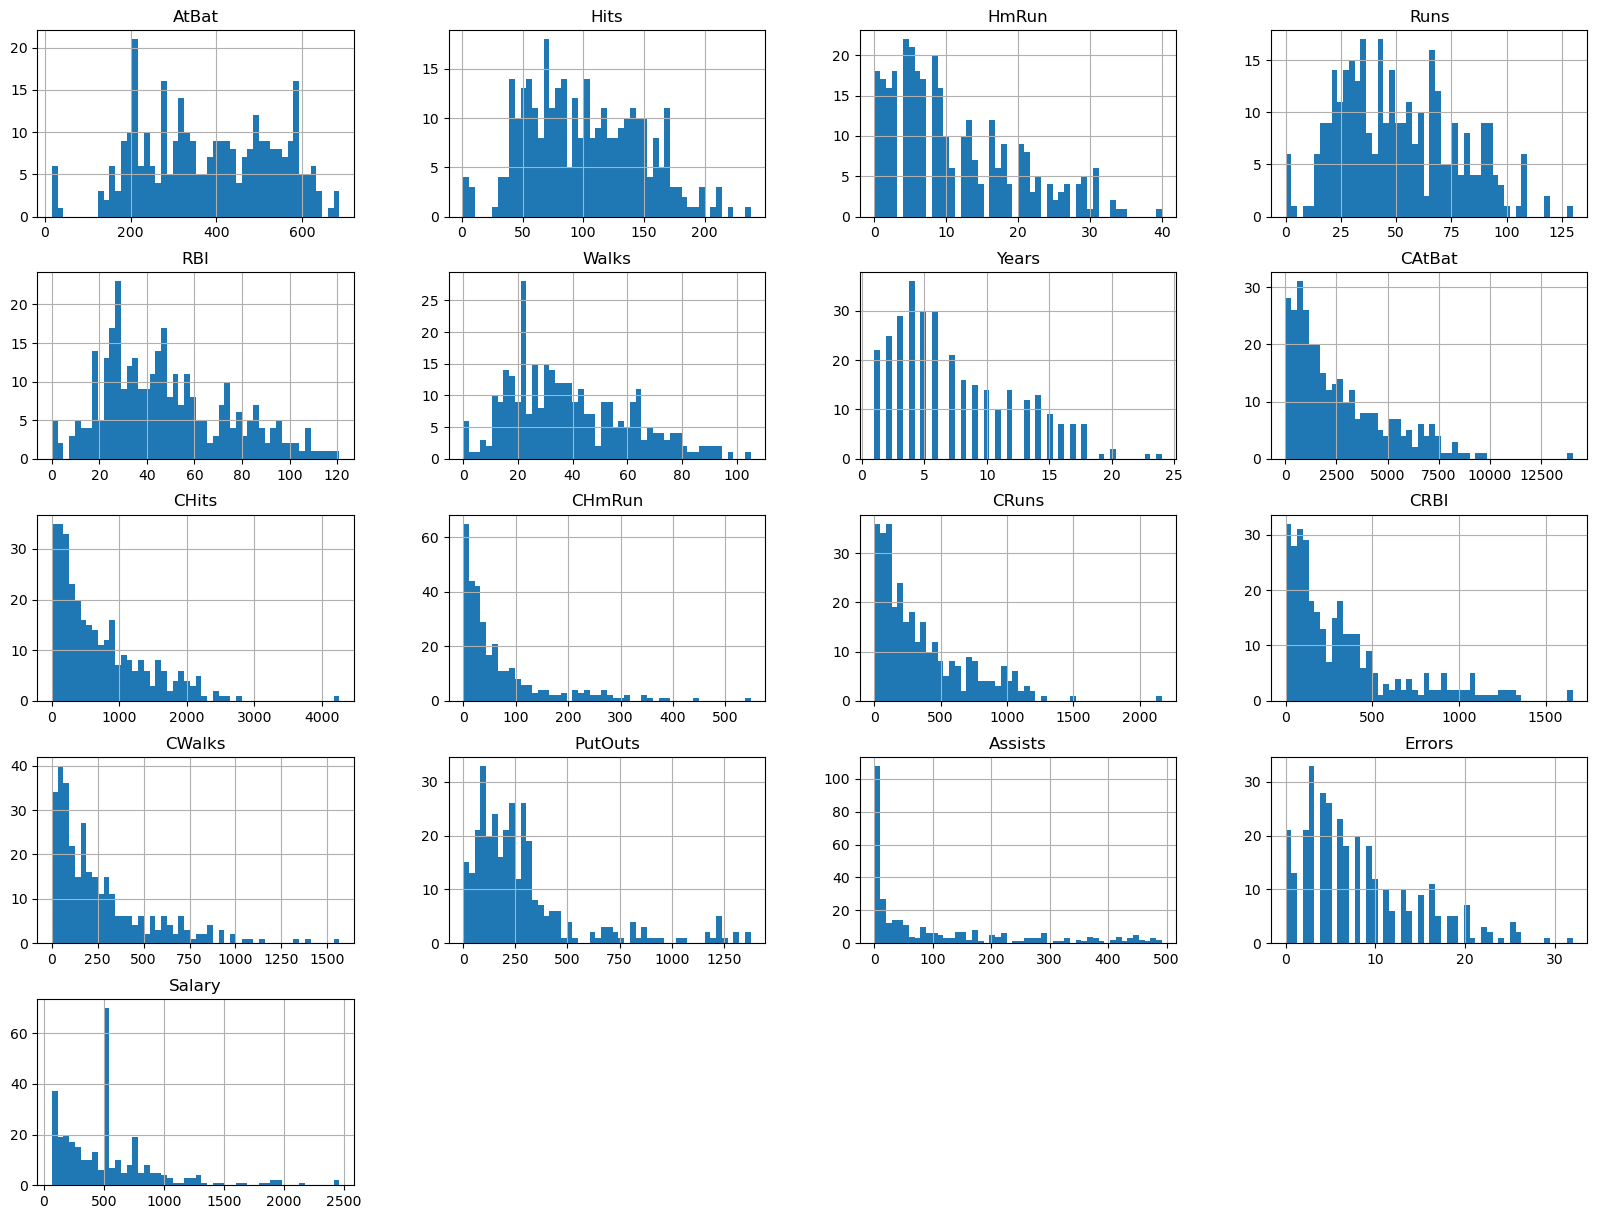

In [323]:
DF.hist(bins=50, figsize=(20,15))
plt.show()

Is imputing with the mean the best thing to do? 

In [324]:
corr_matrix = DF[DF.columns.tolist()].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,-0.101663,-0.045441,0.317550,0.353824,0.352117,0.342474,-0.057655
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,-0.101038,-0.071143,0.310673,0.320455,0.310038,0.384974,-0.060608
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,-0.177258,-0.017206,0.282923,-0.106329,0.039318,0.311615,-0.166044
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,-0.150392,-0.076311,0.279347,0.220567,0.240475,0.372257,-0.115446
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,-0.145597,-0.075531,0.343186,0.106591,0.193370,0.401647,-0.120124
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,-0.045337,-0.059086,0.299515,0.149656,0.129382,0.402465,-0.020029
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.047261,0.021126,-0.004684,-0.080638,-0.162140,0.352235,-0.042919
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,-0.028738,0.022965,0.062283,0.002038,-0.066922,0.467636,-0.016502
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,-0.025790,0.013584,0.076547,-0.002523,-0.062756,0.491152,-0.010047
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,-0.098383,0.006783,0.112724,-0.158511,-0.138115,0.451876,-0.097461


#### Splitting the data 4:1 training:test

In [325]:
train, test = train_test_split(DF, test_size=0.2)
len_DF = len(DF)
print("supsected: \n\tsize of train: ",  0.8*len_DF, "\n\tsize of test: ", 0.2*len_DF)

print("sklearn: \n\tsize of train: ",  len(train), "\n\tsize of test: ", len(test))

supsected: 
	size of train:  257.6 
	size of test:  64.4
sklearn: 
	size of train:  257 
	size of test:  65


#### We can note that sklearn gave the extra observation to the test set

In [326]:
mean = test['Salary'].mean()
acc = 0
for i in range(0, len(test)):
    acc = acc + (test.iloc[i]['Salary'] - mean)**2

stdev_formula = np.sqrt(acc / len(test))
target_error = test['Salary'].std()

print(f"standard deviation by formula: \n\t{stdev_formula}\npandas standard deviation calculation: {target_error}\n\n")


standard deviation by formula: 
	400.2506812867201
pandas standard deviation calculation: 403.3655195582041




#### The formula and the pandas standard deviation calcualtions are roughly the same, where mine is consisently 3-4 [units of Salary] below pandas. 